In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### Загрузка данных

В лабораторной работе будем использовать два набора данных: набор данных о супергероях и набор данных о рейтинге раменов.

In [162]:
heroes = pd.read_csv('heroes_information.csv', sep=",", encoding='ISO-8859-1')
ramen = pd.read_csv('ramen-ratings.csv', sep=",")

In [29]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [163]:
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [164]:
ramen['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [165]:
# Так как в колонке 'Stars' встречаются значения 'Unrated', заменим их на '0.0', чтобы использовать признак как числовой
ramen['Stars'] = ramen['Stars'].replace('Unrated', 0.00)

In [166]:
ramen['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 0.0, '1.5', '3.25', '2', '0', '3', '0.5',
       '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0',
       '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9',
       '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7',
       '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [168]:
ramen['Stars'] = ramen['Stars'].astype('float64')

In [35]:
# Размер наборов данных
heroes.shape

(734, 11)

In [36]:
ramen.shape

(2580, 7)

In [31]:
# Типы колонок
heroes.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [169]:
ramen.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

In [32]:
# Количество пропущенных значений
heroes.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [38]:
ramen.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

## Обработка пропусков в данных

### Удаление колонок с пропусками данных

In [40]:
ramen_new_1 = ramen.dropna(axis=1, how='any')
(ramen.shape, ramen_new_1.shape)

((2580, 7), (2580, 5))

### Удаление строк с пропусками данных

In [41]:
heroes_new_1 = heroes.dropna(axis=0, how='any')
(heroes.shape, heroes_new_1.shape)

((734, 11), (719, 11))

### Заполнение пропусков нулями

In [42]:
# В данном случае это некорректно, так как нулями заполнится колнка 'Style' - категориальный признак
ramen_new_2 = ramen.fillna(0)
ramen_new_2.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0


### Импьютация. Обработка пропусков в числовых данных

In [46]:
# Число строк датасета
total_count = heroes.shape[0]
total_count

734

In [50]:
# Строки датасета, имеющие пропуски в стобце 'Weight'
heroes[heroes['Weight'].isnull()]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [47]:
# Выбор числовых колонок с пропущенными значениями
num_cols = []
for col in heroes.columns:    
    # Количество пустых значений в колонке
    temp_null_count = heroes[heroes[col].isnull()].shape[0]
    # Тип данных колонки
    data_type = str(heroes[col].dtype)    
    if temp_null_count > 0 and (data_type == 'float64' or data_type == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка: {}. Тип данных: {}. Количество пустых значений: {}, {}%.'.format(col, data_type, temp_null_count, temp_perc))

Колонка: Weight. Тип данных: float64. Количество пустых значений: 2, 0.27%.


In [52]:
# Колонки с пропусками числовых данных
heroes_gap = heroes[num_cols]
heroes_gap

,Weight
0,441.0
1,65.0
2,90.0
3,441.0
4,-99.0
...,...
729,52.0
730,-99.0
731,17.0
732,57.0


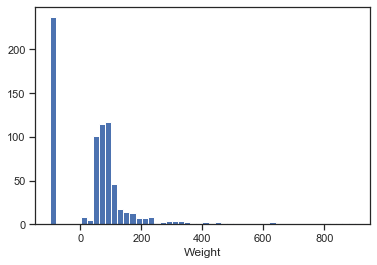

In [61]:
# Гистограмма по признакам (в данном случае датасет имеет лишь один числовой признак с пропусками)
for col in heroes_gap:
    plt.hist(heroes[col], 50)
    plt.xlabel(col)
    plt.show()

In [62]:
# Индексы строк с пустыми значениями
gap_index = heroes[heroes['Weight'].isnull()].index
gap_index

Int64Index([286, 389], dtype='int64')

In [64]:
# Вывод нужных строк по индексу
heroes[heroes.index.isin(gap_index)]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [174]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
weight_missing_values_only = indicator.fit_transform(heroes_gap)
#weight_missing_values_only

In [67]:
# Массив стратегий заполнения пропусков
strategies=['mean', 'median','most_frequent']

In [68]:
# Функция, которая позволяет задавать набор данных, колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    # Выбор данных для импьютации
    temp_data = dataset[[column]]
    
    # Определение пропусков в данных
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    # Выбор стратегии импьютации
    imp_num = SimpleImputer(strategy = strategy_param)
    # Импьютация данных
    data_num_imp = imp_num.fit_transform(temp_data)
    
    # Заполненные пропуски
    filled_data = data_num_imp[mask_missing_values_only]
    
    # Возвращает название колонки, стратегию импьютации, количество заполненных пропусков,
    # первое заполненное значение, последнее заполненное значение
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [69]:
# Характеристики столбца
heroes[['Weight']].describe()

,Weight
count,732.000000
mean,43.855191
std,130.823733
min,-99.000000
25%,-99.000000
50%,62.000000
75%,90.000000
max,900.000000


In [70]:
test_num_impute_col(heroes, 'Weight', strategies[0])

('Weight', 'mean', 2, 43.8551912568306, 43.8551912568306)

In [71]:
test_num_impute_col(heroes, 'Weight', strategies[1])

('Weight', 'median', 2, 62.0, 62.0)

In [72]:
test_num_impute_col(heroes, 'Weight', strategies[2])

('Weight', 'most_frequent', 2, -99.0, -99.0)

### Обработка пропусков в категориальных данных

In [80]:
heroes[heroes['Publisher'].isnull()]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [74]:
# Выбор категориальных колонок с пропущенными значениями
cat_cols = []
for col in heroes.columns:
    # Количество пустых значений 
    temp_null_count = heroes[heroes[col].isnull()].shape[0]
    # Тип данных колонки
    data_type = str(heroes[col].dtype)
    if temp_null_count > 0 and (data_type == 'object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка: {}. Тип данных: {}. Количество пустых значений: {}, {}%.'.format(col, data_type, temp_null_count, temp_perc))

Колонка: Publisher. Тип данных: object. Количество пустых значений: 15, 2.04%.


In [75]:
cat_temp_data = heroes[['Publisher']]
cat_temp_data.head()

,Publisher
0,Marvel Comics
1,Dark Horse Comics
2,DC Comics
3,Marvel Comics
4,Marvel Comics


In [76]:
# Уникальные значения признака
cat_temp_data['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [82]:
# Количество строк с пропусками
cat_temp_data[cat_temp_data['Publisher'].isnull()].shape[0]

15

In [175]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
heroes_publisher = imp2.fit_transform(cat_temp_data)
#heroes_publisher

In [85]:
# Пустые значения (nan) теперь отсутствуют
np.unique(heroes_publisher)

array(['ABC Studios', 'DC Comics', 'Dark Horse Comics', 'George Lucas',
       'Hanna-Barbera', 'HarperCollins', 'IDW Publishing', 'Icon Comics',
       'Image Comics', 'J. K. Rowling', 'J. R. R. Tolkien',
       'Marvel Comics', 'Microsoft', 'NBC - Heroes', 'Rebellion',
       'Shueisha', 'Sony Pictures', 'South Park', 'Star Trek', 'SyFy',
       'Team Epic TV', 'Titan Books', 'Universal Studios', 'Wildstorm'],
      dtype=object)

In [176]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Some unknown publisher')
heroes_publisher_2 = imp3.fit_transform(cat_temp_data)
#heroes_publisher_2

In [87]:
np.unique(heroes_publisher_2)

array(['ABC Studios', 'DC Comics', 'Dark Horse Comics', 'George Lucas',
       'Hanna-Barbera', 'HarperCollins', 'IDW Publishing', 'Icon Comics',
       'Image Comics', 'J. K. Rowling', 'J. R. R. Tolkien',
       'Marvel Comics', 'Microsoft', 'NBC - Heroes', 'Rebellion',
       'Shueisha', 'Some unknown publisher', 'Sony Pictures',
       'South Park', 'Star Trek', 'SyFy', 'Team Epic TV', 'Titan Books',
       'Universal Studios', 'Wildstorm'], dtype=object)

In [88]:
# Количество преобразованных строк
heroes_publisher_2[heroes_publisher_2 == 'Some unknown publisher'].size

15

In [97]:
ramen[ramen['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [100]:
cat_temp_data_2 = ramen[['Style']]
cat_temp_data_2

,Style
0,Cup
1,Pack
2,Cup
3,Pack
4,Pack
...,...
2575,Bowl
2576,Pack
2577,Pack
2578,Pack


In [104]:
# Уникальные значения признака
cat_temp_data_2['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [101]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
ramen_style = imp4.fit_transform(cat_temp_data_2)
ramen_style

array([['Cup'],
       ['Pack'],
       ['Cup'],
       ...,
       ['Pack'],
       ['Pack'],
       ['Pack']], dtype=object)

In [102]:
# Пустые значения (nan) теперь отсутствуют
np.unique(ramen_style)

array(['Bar', 'Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Tray'], dtype=object)

## Кодирование категориальных признаков

### Кодирование целочисленными значениями

In [90]:
# Выберем признак 'Publisher'
cat_enc = pd.DataFrame({'Publisher':heroes_publisher_2.T[0]})
cat_enc

,Publisher
0,Marvel Comics
1,Dark Horse Comics
2,DC Comics
3,Marvel Comics
4,Marvel Comics
...,...
729,Marvel Comics
730,Marvel Comics
731,George Lucas
732,DC Comics


In [93]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Publisher'])

In [94]:
# Первоначальные значения категориального признака
cat_enc['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Some unknown publisher',
       'Icon Comics', 'SyFy', 'Hanna-Barbera', 'George Lucas',
       'Team Epic TV', 'South Park', 'HarperCollins', 'ABC Studios',
       'Universal Studios', 'Star Trek', 'IDW Publishing', 'Shueisha',
       'Sony Pictures', 'J. K. Rowling', 'Titan Books', 'Rebellion',
       'Microsoft', 'J. R. R. Tolkien'], dtype=object)

In [95]:
# Закодированные значения категориального признака
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [96]:
# Просмотр значений
le.inverse_transform([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

array(['ABC Studios', 'DC Comics', 'Dark Horse Comics', 'George Lucas',
       'Hanna-Barbera', 'HarperCollins', 'IDW Publishing', 'Icon Comics',
       'Image Comics', 'J. K. Rowling', 'J. R. R. Tolkien',
       'Marvel Comics', 'Microsoft', 'NBC - Heroes', 'Rebellion',
       'Shueisha', 'Some unknown publisher', 'Sony Pictures',
       'South Park', 'Star Trek', 'SyFy', 'Team Epic TV', 'Titan Books',
       'Universal Studios', 'Wildstorm'], dtype=object)

### Кодирование наборами бинарных значений - one-hot encoding

In [126]:
# Выберем признак 'Style'
cat_enc = pd.DataFrame({'Style':ramen_style.T[0]})
cat_enc

,Style
0,Cup
1,Pack
2,Cup
3,Pack
4,Pack
...,...
2575,Bowl
2576,Pack
2577,Pack
2578,Pack


In [127]:
# Кодирование
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['Style']])

In [128]:
# Размер до кодирования
cat_enc.shape

(2580, 1)

In [129]:
# Размер после кодирования
cat_enc_ohe.shape

(2580, 7)

In [130]:
cat_enc_ohe

<2580x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2580 stored elements in Compressed Sparse Row format>

In [131]:
# Первые 10 строк закодированного набора данных
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.]])

In [132]:
# Исходные данные
cat_enc.head(10)

,Style
0,Cup
1,Pack
2,Cup
3,Pack
4,Pack
5,Pack
6,Cup
7,Tray
8,Pack
9,Pack


In [133]:
# Массив закодированных данных
cat_enc_ohe.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [134]:
# Транспонирование массива
с = cat_enc_ohe.transpose()
с.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
c1 = с[0].toarray()
c2 = с[1].toarray()
c3 = с[2].toarray()
c4 = с[3].toarray()
c5 = с[4].toarray()
c6 = с[5].toarray()
c7 = с[6].toarray()

In [140]:
# Преобразование массива в DataFrame
style = pd.DataFrame(data = np.c_[c1[0], c2[0], c3[0], c4[0], c5[0], c6[0], c7[0]], 
                       columns = ['style_1', 'style_2', 'style_3', 'style_4', 'style_5', 'style_6', 'style_7'])
style

,style_1,style_2,style_3,style_4,style_5,style_6,style_7
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
2575,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2576,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2577,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2578,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Кодирование при помощи pandas get_dummies - быстрого варианта one-hot кодирования

In [141]:
# Выберем признак 'Eye color'
eye_color = pd.DataFrame(heroes['Eye color'])
eye_color

,Eye color
0,yellow
1,blue
2,blue
3,green
4,blue
...,...
729,blue
730,white
731,brown
732,blue


In [142]:
pd.get_dummies(eye_color).head()

,Eye color_-,Eye color_amber,Eye color_black,Eye color_blue,Eye color_blue / white,Eye color_bown,Eye color_brown,Eye color_gold,Eye color_green,Eye color_green / blue,...,Eye color_purple,Eye color_red,Eye color_silver,Eye color_violet,Eye color_white,Eye color_white / red,Eye color_yellow,Eye color_yellow (without irises),Eye color_yellow / blue,Eye color_yellow / red
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

### MinMax масштабирование

In [143]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(heroes[['Height']])

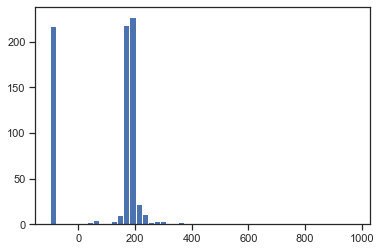

In [144]:
# Гистограмма исходных данных
plt.hist(heroes['Height'], 50)
plt.show()

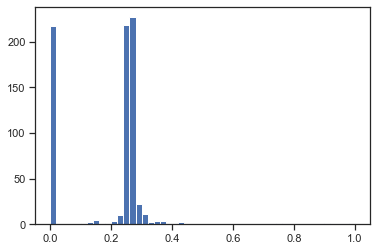

In [145]:
# Гистограмма после масштабирования данных
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [146]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(heroes[['Weight']])

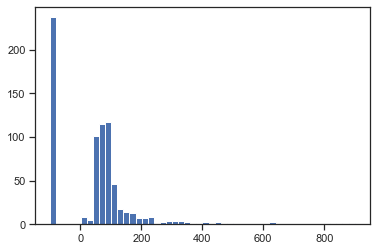

In [148]:
# Гистограмма исходных данных
plt.hist(heroes['Weight'], 50)
plt.show()

c:\users\дарья\virtualenvs\tensorflow\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\дарья\virtualenvs\tensorflow\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


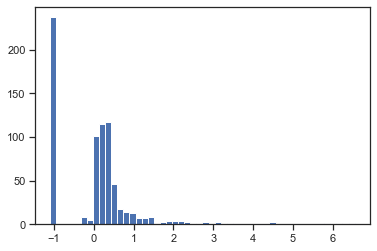

In [147]:
# Гистограмма после масштабирования данных
plt.hist(sc2_data, 50)
plt.show()

### Нормализация данных

In [170]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(ramen[['Stars']])

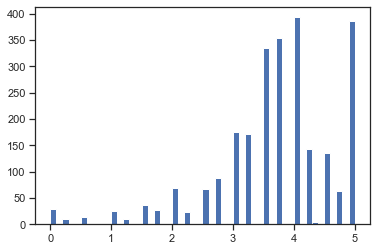

In [173]:
# Гистограмма исходных данных
plt.hist(ramen['Stars'], 50)
plt.show()

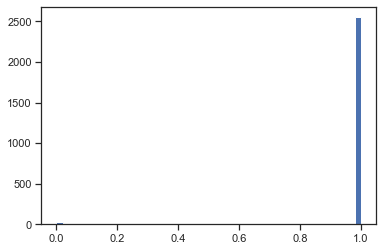

In [172]:
# Гистограмма после нормализации данных
plt.hist(sc3_data, 50)
plt.show()